# Amazon Product Review Sentiment Analysis using LSTM

## Objective : 
The objective of this project is to find whether a Amazon product review is positive or negative. I have around 570K product's data. We have columns like Productid, userid, score, summary, Text etc. I used RNN-LSTM(Long short term memory) for sentiment analysis.

## Steps that I followed :
1) Importing libraries <br>
2) understanding data <br>
3) removing missing values <br>
4) data analysis <br>
5) data visualization <br>
6) LSTM implementation <br>
7) some testing on trained model <br>

## 1) Importing Libraries

<b> pandas </b>: pandas is useful for dataframe manipulation, dataframe operations <br>
<b> matplotlib,seaborn </b>: matplotlib and seaborn both are useful for data visualization <br>
<b> string/punctuation  </b> : it is use for removing punctuations from review string <br>
<b> tensorflow </b>: all tensorflow library are useful in implementing LSTM

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from string import punctuation
import warnings
from collections import Counter
import re
import tensorflow as tf 
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout,SpatialDropout1D,Embedding

In [237]:
dataset = pd.read_csv('Amazon Product Reviews.csv')

## 2) Understanding data

dataset has 10 columns and 568454 rows. Important columns are productid, userid, score and text. 

In [238]:
dataset

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


### info() :
<b> Info gives us each columns type and not null count. From the output we can say that productid, userid, profilename, summary and text are string columns and rest are integer. <b>

In [239]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


### describe():
<b> describe gives us statistical analysis of int as well as object type columns. From the output, we can say that mean of score is 4.183309 and standard deviaation of score is 1.310436. Describe gives us overview of data which can help in decision making. </b>

In [240]:
dataset.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


## 3) Removing missing values

<b> we need to check first that how many rows or columns have missing values. If we do not handle data well, then our analysis will have noise. There are multiple ways to handle data. 1) replacing with upper/lower value, 2) replacing with mean/median value in numeric data, 3) removing data. We first check if we have missing value or not using isnull() and take some of all missing value in a given column. We can see that profilename and summary has missing values.

<b> Profilename has 16 value missing and Summary has 27 value missing. We have total 568454 rows of data. So if we remove this missing vlaue rows, then still our model will give accurate results as removing this values does not affect the overall outcomes. So we will remove missing rows by using dropna(). </b>

In [242]:
dataset = dataset.dropna()

<b> We can see that we have remove all missing values and we are ready for the next step. </b>

In [243]:
for col in dataset:
    print(col + ": " + str(dataset[col].isnull().values.any()) + " count: " + str(dataset[col].isnull().sum()))

Id: False count: 0
ProductId: False count: 0
UserId: False count: 0
ProfileName: False count: 0
HelpfulnessNumerator: False count: 0
HelpfulnessDenominator: False count: 0
Score: False count: 0
Time: False count: 0
Summary: False count: 0
Text: False count: 0


## 3-4) Data Analysis and Data Visualization

Till now, we have understand the data. What fields are, which things are important and which aren not and we have handle data as well. Now we will explore each relevent columns and see what we can find from the data.

<b> Using score column, we can find that how many time people have give 5 ratings, 4 ratings and all. We can see that about 363K people have give 5 ratings while 52K people have give 1 rating. We use matplotlib and seaborn to visualize the result. </b>

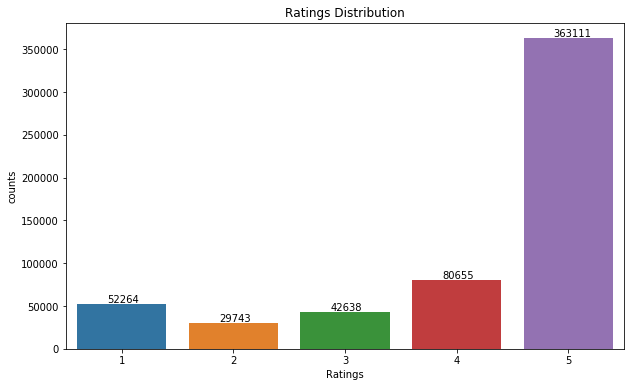

In [244]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x ='Score', data = dataset) 
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.27, p.get_height()+2000))
plt.show()

#### Data is mixed of different users. So now, I am finding how many people have bought a particular product. From the output, we can say that product with productid B007JFMH8M is highest bought product with 913 rows. We can say that people like this product very much and this product is very common. We can also see that there are 74258 unique products in our dataset.

In [257]:
unique_product = dataset['ProductId'].value_counts().reset_index().sort_values('index',ascending=True)
unique_product = unique_product.rename(columns = {'ProductId':'Counts','index':'ProductId'})
unique_product = unique_product.reset_index(drop=True)
print(unique_product.sort_values('Counts', ascending = False))

        ProductId  Counts
71170  B007JFMH8M     913
37898  B0026RQTGE     632
42264  B002QWP8H0     632
42257  B002QWHJOU     632
42263  B002QWP89S     632
...           ...     ...
21719  B000YPQC08       1
51301  B003YU5T6I       1
21720  B000YPQC44       1
21721  B000YPQE6U       1
74257  B009WVB40S       1

[74258 rows x 2 columns]


<b> Now we have seen that multiple user have bought same products. So their ratings also will be a different. So now, we will find average score of each product. From the average and number of reviews, we can predict whether people likes a product or not. </b>

In [246]:
average_score_count = dataset.groupby(['ProductId','Score']).Score.sum().reset_index(name='TotalReview')
total_review_count = average_score_count.groupby('ProductId')['TotalReview'].sum().reset_index(name='TotalReview').sort_values('ProductId', ascending = True)

In [247]:
total_review_count['ProductCount'] = unique_product['Counts']
total_review_count['AverageScore'] = round(total_review_count['TotalReview'] / total_review_count['ProductCount'],2)
total_review_count

,ProductId,TotalReview,ProductCount,AverageScore
0,0006641040,161,37,4.35
1,141278509X,5,1,5.00
2,2734888454,7,2,3.50
3,2841233731,5,1,5.00
4,7310172001,822,173,4.75
...,...,...,...,...
74253,B009UOFTUI,1,1,1.00
74254,B009UOFU20,1,1,1.00
74255,B009UUS05I,5,1,5.00
74256,B009WSNWC4,5,1,5.00


<b> To trust any ratings, we need to put some threshold on number of reviews. I am finding reviews with greater than 200 review on that product. So we can rely on ratings more as more people have give their opinion about product. We can see that only 300 product have more than 200 reviews. </b>

In [248]:
total_review_count_sorted = total_review_count[total_review_count['ProductCount'] > 200].sort_values('AverageScore').reset_index(drop=True)
total_review_count_sorted

,ProductId,TotalReview,ProductCount,AverageScore
0,B004OAZ36I,871,286,3.05
1,B0083T5TAQ,871,286,3.05
2,B006Q820X0,781,252,3.10
3,B009RB4GO4,789,251,3.14
4,B0041NYV8E,1419,452,3.14
...,...,...,...,...
297,B000GAT6NG,1868,389,4.80
298,B004EAGP74,1868,389,4.80
299,B001E8DHPW,1868,389,4.80
300,B003QDRJXY,1277,264,4.84


<b> Now we will visualize above table average score. We can see that ratings 4.49 has hightest counts. So we cansay that more products have average 4.49 ratings than others. Some of them has higher ratings nad some of them has lower ratings. </b>

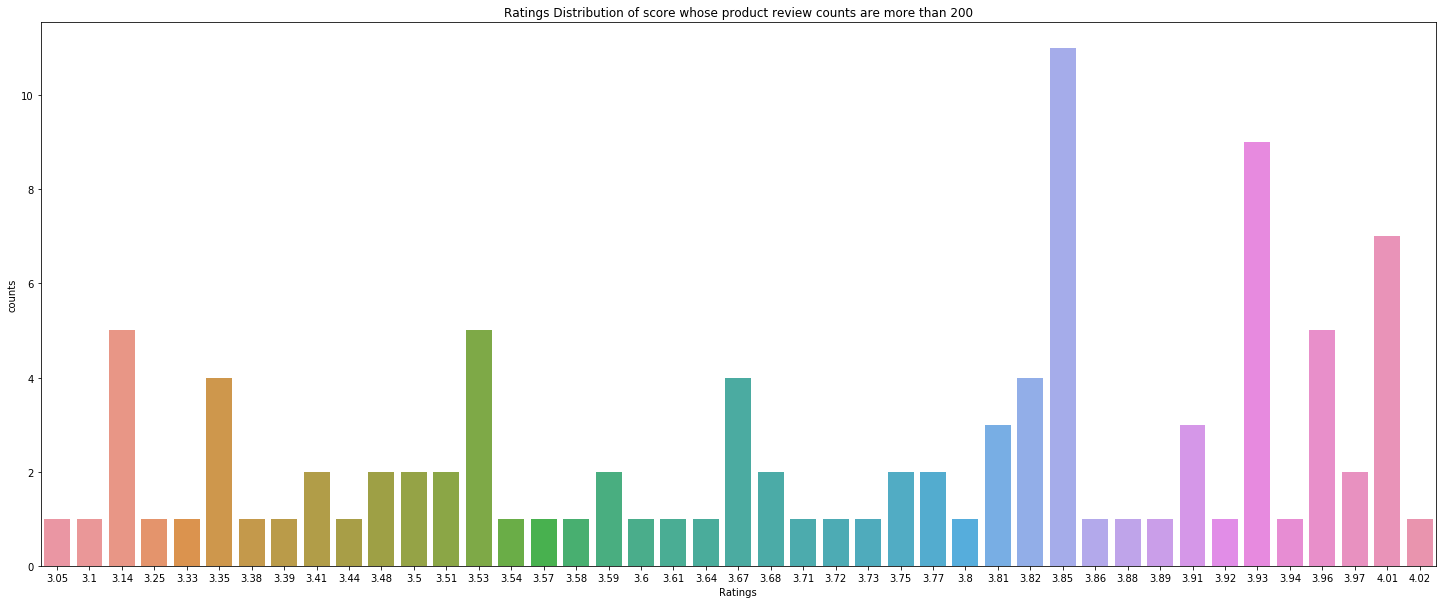

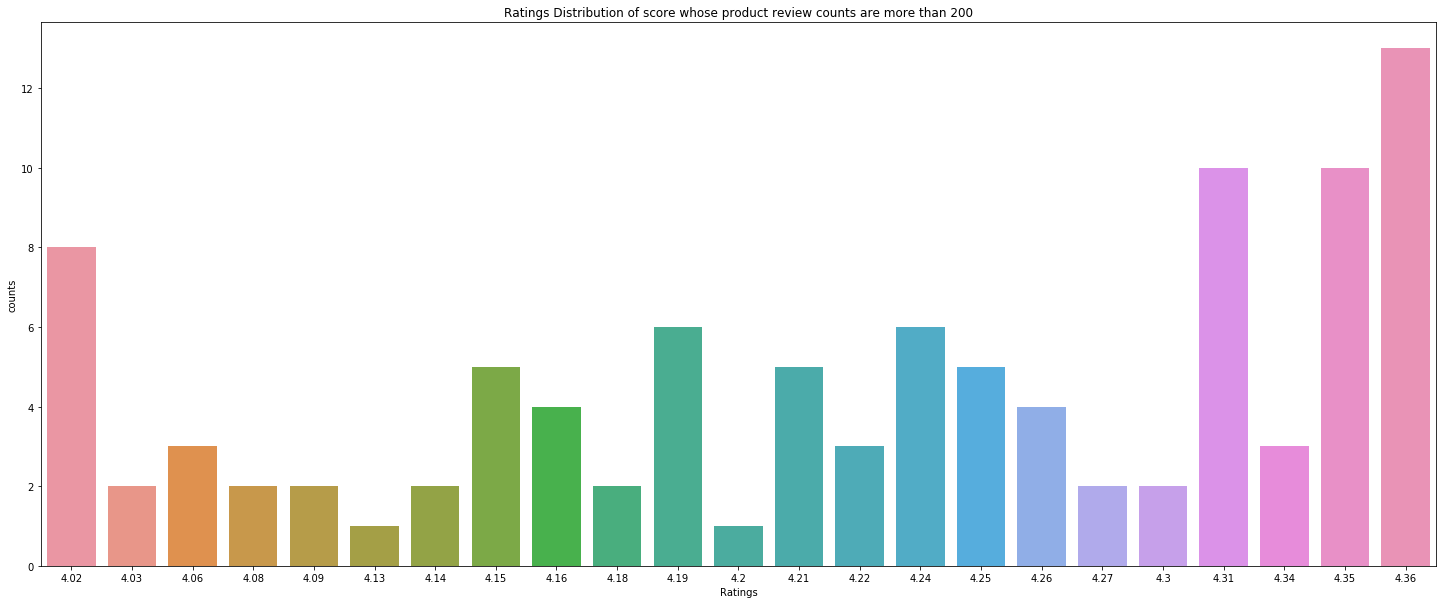

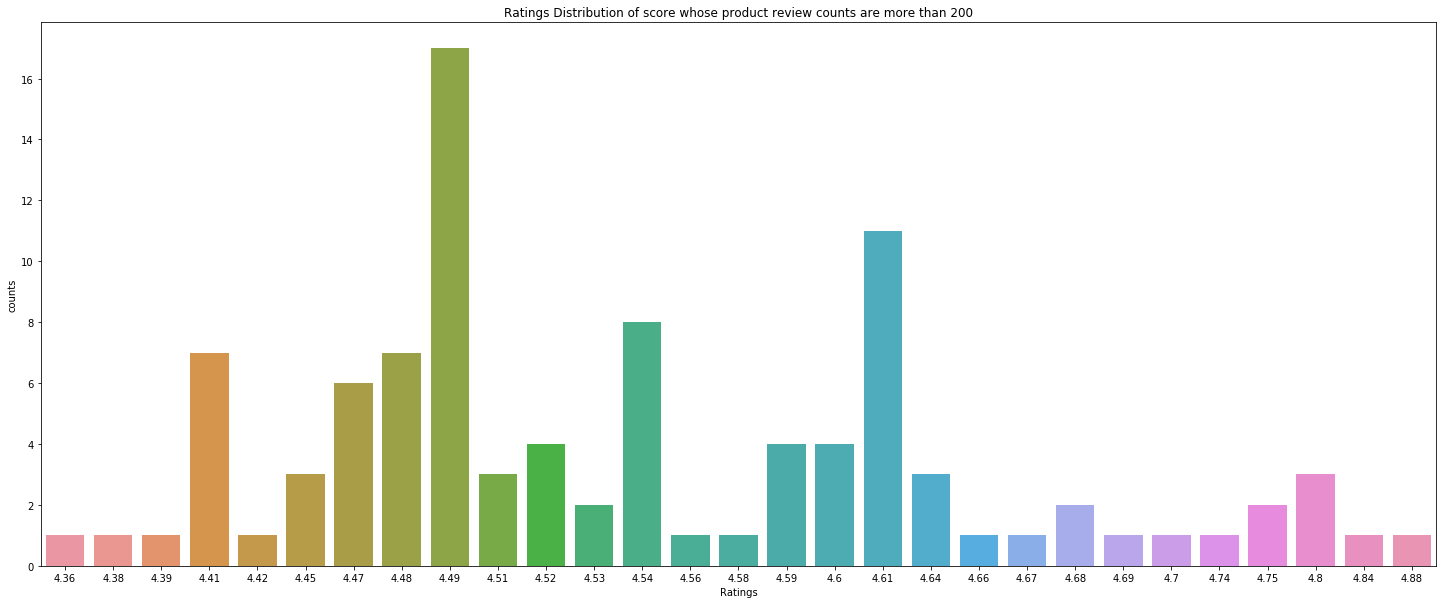

In [249]:
for i in range(1,len(total_review_count_sorted),101):
    plt.figure(figsize=(25,10))
    ax = sns.countplot(x ='AverageScore', data = total_review_count_sorted.iloc[i:i+101]) 
    plt.title('Ratings Distribution of score whose product review counts are more than 200')
    plt.xlabel('Ratings')
    plt.ylabel('counts')
    plt.show()

<b> Till now, we have explore data from product side. Now we will look that how many products are bought by users. We will find how many products each users have bought. From the output below, we cansat that userid with A3OXHLG6DIBRW8 and profile name 'C. F. Hill "CFH" has bought highest prodcuts ( 448 products). </b>

In [250]:
dataset.groupby(['UserId','ProfileName']).size().reset_index(name="Count").sort_values(['Count'],ascending=False)

,UserId,ProfileName,Count
182042,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",448
65599,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",421
252312,AY12DBB0U420B,Gary Peterson,389
82934,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",365
66175,A1Z54EM24Y40LL,c2,256
...,...,...,...
101210,A2HRJ9LQ8ONG2S,Nicole Bennett,1
101211,A2HRJMGPNEF3DF,"Linda J. Mcdonell ""Linda Mac""",1
101212,A2HRKI86DC1MOQ,vanbushden,1
101213,A2HRKQ55KIZVO3,ridinghood,1


## 6) LSTM implementation 

So far we did data preprocessing, analysis and visualize data. Now we will implement LSTM. There are three columns that I have not used. HelfulnessNumerator, helpfullnessdenominator, summary and time. There is no description of these columns which is why  We will drop these columns. 

In [251]:
dataset = dataset.drop( columns = {'HelpfulnessNumerator','HelpfulnessDenominator','Time'})

<b> Machine learning model only understands data in numerical form. SO we will create a one column call "sentiment". From the score column, we will create a sentiment column by giving value 1 to score greather and equals to 3. So every score 3 and above 3 is considered as positive and rest are negative reviews. These will help us in training out model. So, our feature will be text column and ground truth will be sentiment column. </b>

In [252]:
dataset['Sentiment'] = 0
dataset['Sentiment'][dataset.Score >= 3] = 1
dataset

,Id,ProductId,UserId,ProfileName,Score,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...,1
...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,5,Will not do without,Great for sesame chicken..this is a good if no...,1
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,2,disappointed,I'm disappointed with the flavor. The chocolat...,0
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",5,Favorite Training and reward treat,These are the BEST treats for training and rew...,1


<b> We can see that over 85% reviews are positive and around 15% review are negative. </b>

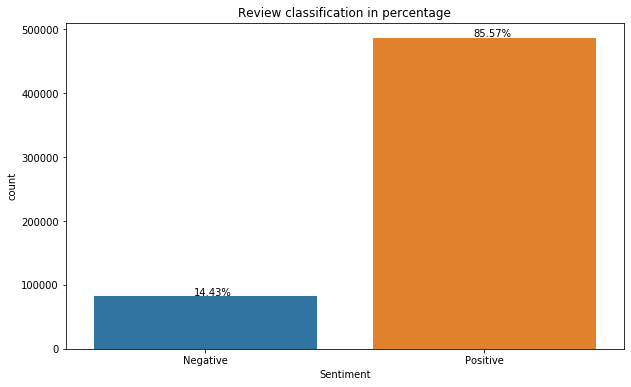

In [253]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'Sentiment',data = dataset)
plt.xticks([0,1],['Negative','Positive'])
plt.title('Review classification in percentage')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/len(dataset)), (p.get_x()+0.36, p.get_height()+2000))
plt.show()

<b> we will find average length of reviews to convert each reviews into same length. We first remove punctuations so 'don;t' and dont will not count as different word. </b>

In [254]:
count,sums = 0,0
for each_review in text_list:
    count += 1
    sums += len(each_review)

print("Number of reviews = {} and length of all reviews = {}".format(count,sums))
print("Average length of a review {:.2f}".format(sums/count))

Number of reviews = 568411 and length of all reviews = 238054928
Average length of a review 418.81


In [255]:
dataset['Text'] = dataset['Text'].str.lower()
dataset['Text'] = dataset['Text'].str.replace('[{}]'.format(punctuation), '')

<b> First we convert Text column into list. Then we will Initialize the tokenizer with a length of Text column as word limit. This is the number of words we would like to encode. we call fit_on_texts to create associations of words and numbers. </b>


In [47]:
text_list = dataset.Text.to_list()
tokenizer = Tokenizer(num_words=len(text_list))
tokenizer.fit_on_texts(text_list)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(text_list)
padded_sequence = pad_sequences(encoded_docs, maxlen=400)

<b> texts_to_sequences will repalce all the words in review with their respective associated numbers. THe output for this is shown below. </b>

In [48]:
print(text_list[0])
print(encoded_docs[0])

i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than  most
[2, 16, 121, 306, 7, 1, 5312, 505, 104, 55, 209, 3, 16, 114, 28, 41, 5, 30, 7, 29, 185, 1, 42, 604, 47, 25, 4, 2646, 57, 4, 1209, 449, 3, 6, 602, 99, 12, 5500, 8, 1771, 3, 95, 9094, 9, 42, 99, 57, 134]


<b> Each review has different lengths. But for any model input, we need to pass each review with same length. So we will pad the sequence to have average length of all reviews. This is done by calling pad_sequences function which gives following output. </b>


In [49]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

<b> Now, we will use sequential model to implement LSTM. Following is the structure of LSTM. First, there is a embendding layer which is our input layer. Then output of the embedding layer is the input of LSTM layer. We will add dropout in each state to avoid overfitting conditions. We will use 50 units of LSTM. Dropout removes some elements of one layer of input at random. A common and important tool in RNNs is a recurrent dropout, which does not remove any inputs between layers but inputs between time steps. Just as with regular dropout, recurrent dropout has a regularizing effect and can prevent overfitting. Summary of model is shown below.</b>

In [51]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=400) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 32)           7704064   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 400, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 7,720,715
Trainable params: 7,720,715
Non-trainable params: 0
_________________________________________________________________
None


<b> Now we will train our model. We have divided our dataset into 80% training and 20% validation. We have use 5 epochs and each batch size is 32. The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. A number of epochs means how many times you go through your training set. Model is updated each time batch_size is processed that means it can be updated multiple times during one epochs. We can see that we got around 94.7% accuracy with training data and 94.39% accuracy with validation data. So our model can predict 94% accurate results. </b>


In [55]:
history = model.fit(padded_sequence,np.array(dataset.Sentiment.to_list()),validation_split=0.2, epochs=5, batch_size=32)

Train on 454728 samples, validate on 113683 samples
Epoch 1/5
454728/454728 [==============================] - 5298s 12ms/sample - loss: 0.2486 - accuracy: 0.9016 - val_loss: 0.1822 - val_accuracy: 0.9268
Epoch 2/5
454728/454728 [==============================] - 8190s 18ms/sample - loss: 0.1842 - accuracy: 0.9266 - val_loss: 0.1599 - val_accuracy: 0.9365
Epoch 3/5
454728/454728 [==============================] - 5484s 12ms/sample - loss: 0.1607 - accuracy: 0.9369 - val_loss: 0.1553 - val_accuracy: 0.9391
Epoch 4/5
454728/454728 [==============================] - 5141s 11ms/sample - loss: 0.1469 - accuracy: 0.9429 - val_loss: 0.1493 - val_accuracy: 0.9427
Epoch 5/5
454728/454728 [==============================] - 5137s 11ms/sample - loss: 0.1373 - accuracy: 0.9470 - val_loss: 0.1461 - val_accuracy: 0.9439


<b> We will save our trained model into .h5 format to use any time. So now our model is trained and now we need to test our model. </b>

In [111]:
model.save('my_model.h5') 
model = tf.keras.models.load_model('my_model.h5')

<b> we will plot the accuracy graph as well as loss graph for each epoch to see how result change at each epochs. The result is as follows</b>

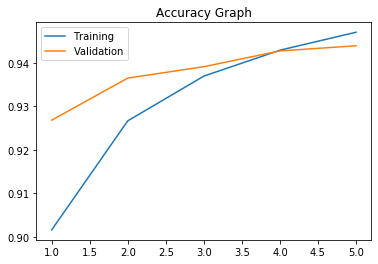

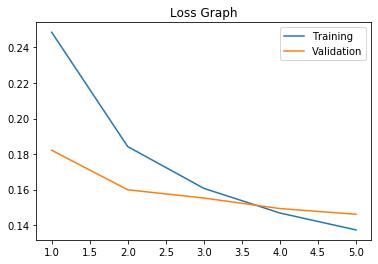

In [112]:
plt.plot(range(1,6),history.history['accuracy'], label='Training')
plt.plot(range(1,6),history.history['val_accuracy'], label='Validation')
plt.legend()
plt.title('Accuracy Graph')
plt.show()

plt.plot(range(1,6),history.history['loss'], label='Training')
plt.plot(range(1,6),history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Loss Graph')
plt.show()

## 7) Testing our model
### 1)

In [269]:
test_word ="This movie had the best acting and the dialogue was so good. I loved it."
actual_result = 1
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=400)
prediction = int(model.predict(tw).round().item())
print("Sentiment :- Negative -> 0 & Postive -> 1")
print("predictied result -> {} & actual result -> {}".format(prediction,actual_result))

Sentiment :- Negative -> 0 & Postive -> 1
predictied result -> 1 & actual result -> 1


## 2)

In [270]:
test_word ="When I use my computer for long periods of time, I usually start to cramp up in my hand. This wrist brace has helped my hand so I don't have that problem anymore. It makes it more comfortable and easy to feel like it is helping the structure of my hand. Really worth the purchase, and very cost effective. Think anyone using computer for long periods of times should use this to avoid damage to your hand."
actual_result = 1
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=400)
prediction = int(model.predict(tw).round().item())
print("Sentiment :- Negative -> 0 & Postive -> 1")
print("predictied result -> {} & actual result -> {}".format(prediction,actual_result))

Sentiment :- Negative -> 0 & Postive -> 1
predictied result -> 1 & actual result -> 1


## 3) 

In [268]:
test_word ="I was excited when I unpacked this product. It appeared to be a lightweight and clever solution to my medical issue. Unfortunately, it is made of very stretchable rubber. Once in place with just the right amount of tightness, it 'gives' and becomes loose after 5 minutes or so. I found myself having to unwrap it and re-install frequently. It didn't get the job done, so I returned it."
actual_result = 0
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=400)
prediction = int(model.predict(tw).round().item())
print("Sentiment :- Negative -> 0 & Postive -> 1")
print("predictied result: {} & actual result: {}".format(prediction,actual_result))

Sentiment :- Negative -> 0 & Postive -> 1
predictied result: 0 & actual result: 0


<b> So we have successfully implemented sentiment analysis using LSTM algorithm on Amazon product review dataset and got 94% accuracy. </b>